In [1300]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1301]:
#read the dataset
data = pd.read_csv('final_data1.csv')

In [1302]:
len(data)
data.info() # Number of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn                  5006 non-null   object 
 1   text_reviews_count    8008 non-null   int64  
 2   series                8008 non-null   object 
 3   country_code          8008 non-null   object 
 4   language_code         4772 non-null   object 
 5   popular_shelves       8008 non-null   object 
 6   asin                  1440 non-null   object 
 7   is_ebook              8008 non-null   bool   
 8   average_rating        8008 non-null   float64
 9   kindle_asin           3468 non-null   object 
 10  similar_books         8008 non-null   object 
 11  description           7040 non-null   object 
 12  format                6014 non-null   object 
 13  link                  8008 non-null   object 
 14  authors               8008 non-null   object 
 15  publisher            

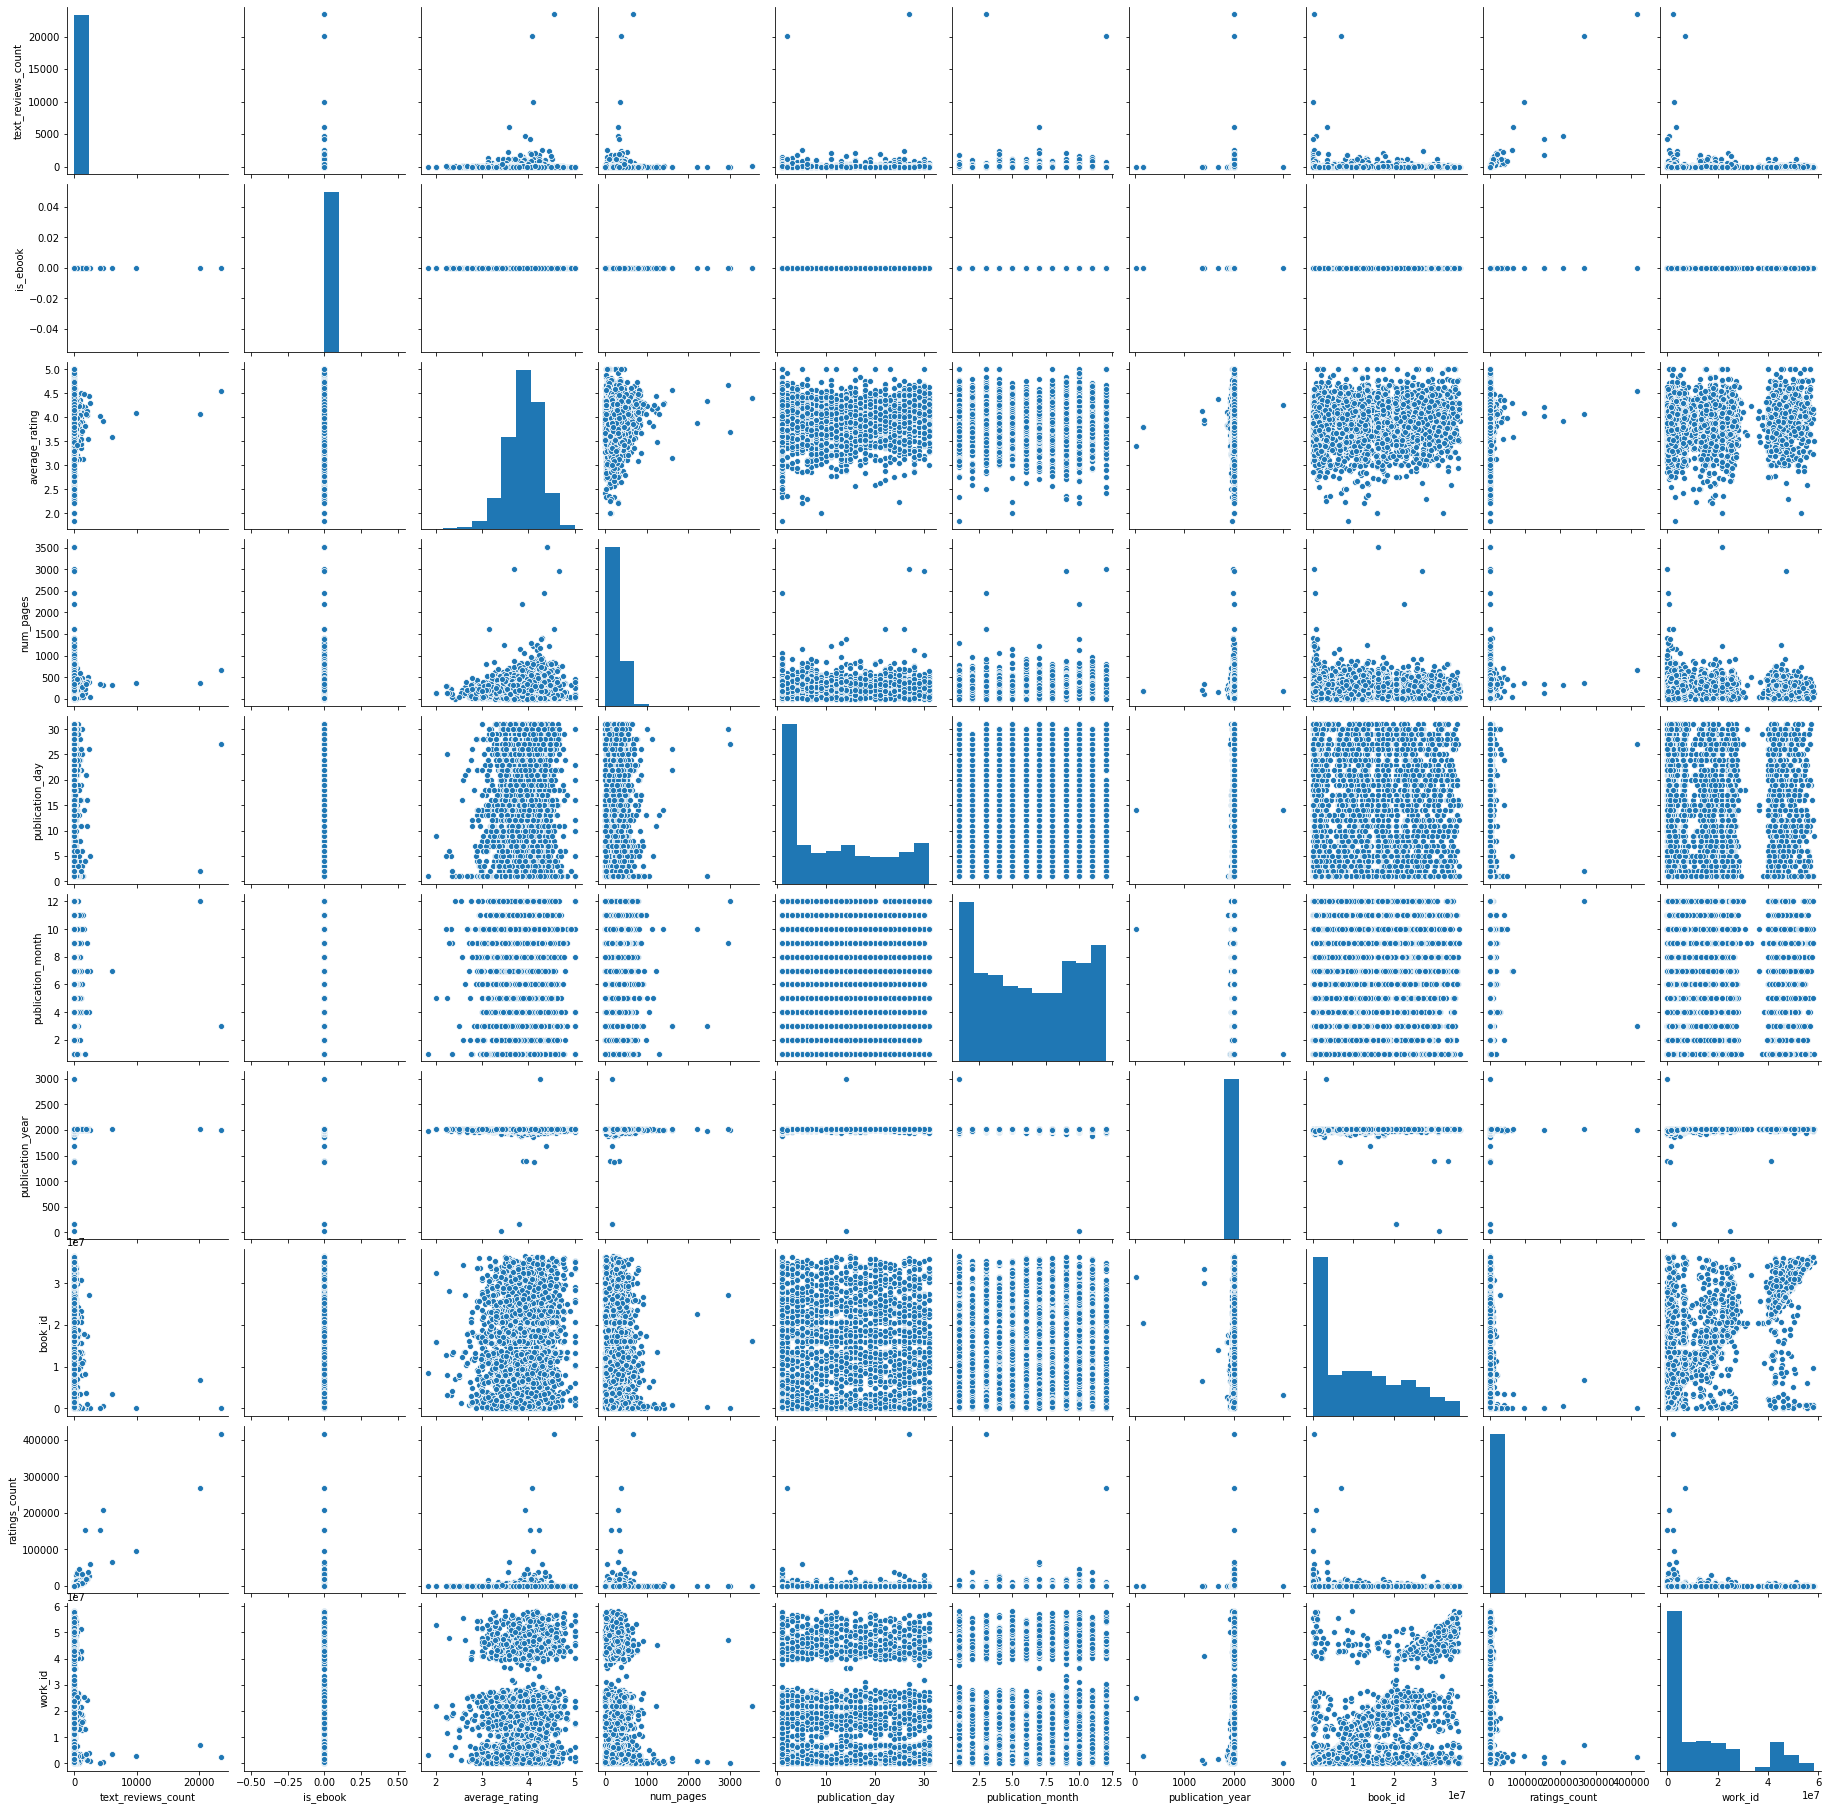

In [1254]:
#Pairplot of data
data = data.drop(data.index[data['is_ebook']])
s=sns.pairplot(data)
s.savefig('res.png')

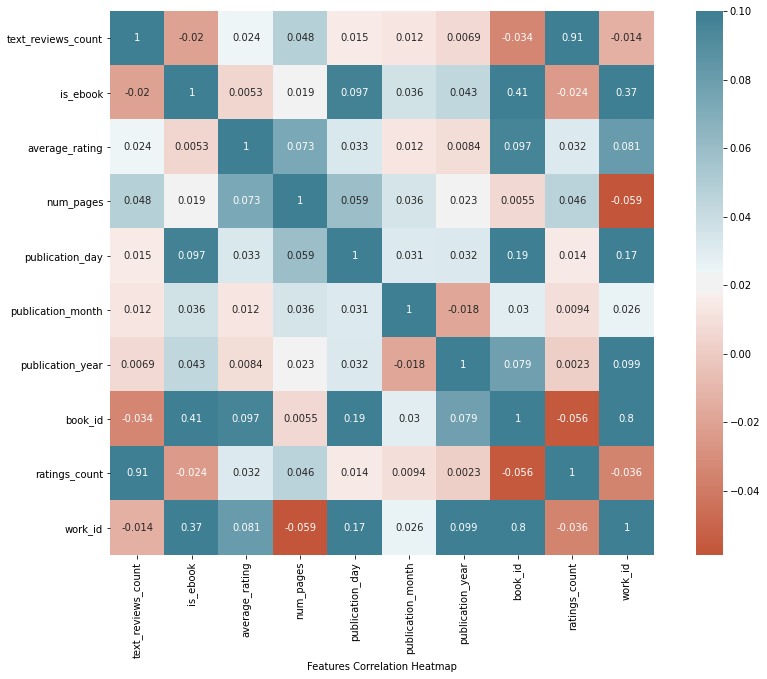

In [1222]:
# Visualizing correlation for numerical features
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),square=True,vmax=0.1,cmap=sns.diverging_palette(20, 220, n=200),annot=True)
plt.xlabel('Features Correlation Heatmap')
plt.show()

In [1303]:
#remove entries with NaN values for columns taken as features
data = data[data['publication_year'].notna()]
data = data[data['authors'].notna()]
data = data[data['num_pages'].notna()]
data = data[data['genre'].notna()]

In [1304]:
len(data)

5347

In [1305]:
# Languages vs Average Rating

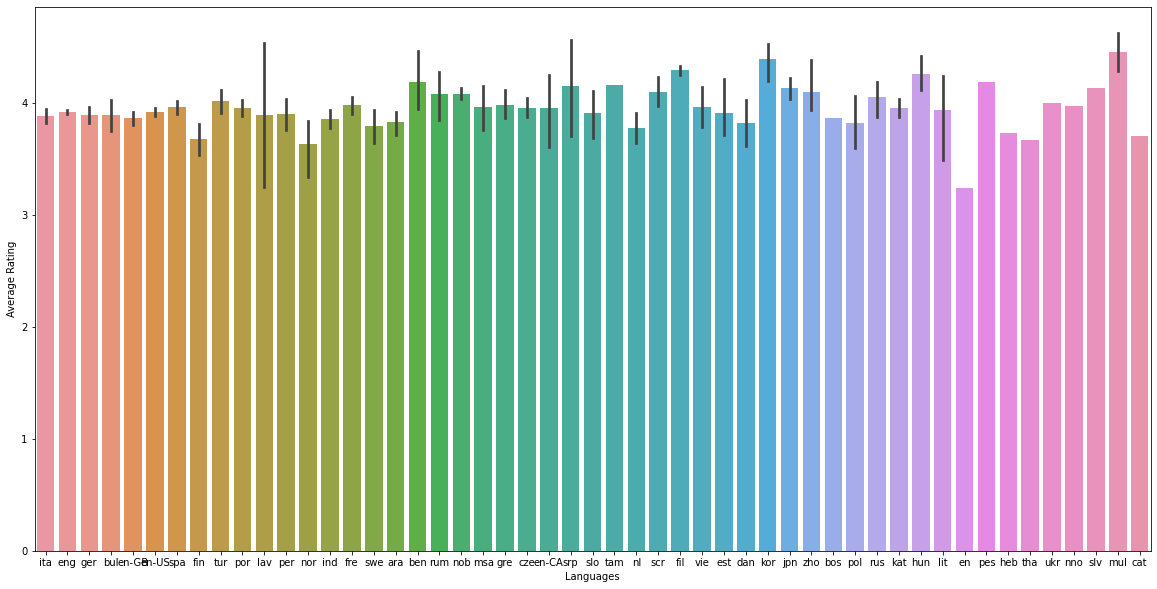

In [1306]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x='language_code',y='average_rating')
plt.xlabel('Languages')
plt.ylabel('Average Rating')
plt.show()

In [1307]:
#determine age of book as (2020 - publication_year)
data['age'] = [(2020 - int(x)) for x in data['publication_year']] 

In [1308]:
#select columns title, authors, num_pages, age, genre, and average_rating as data
data = data[['authors', 'average_rating', 'num_pages', 'age']]

In [1309]:
#look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 0 to 8006
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         5347 non-null   object 
 1   average_rating  5347 non-null   float64
 2   num_pages       5347 non-null   float64
 3   age             5347 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 368.9+ KB


In [1310]:
# Some visualizations for understanding the features and correlation

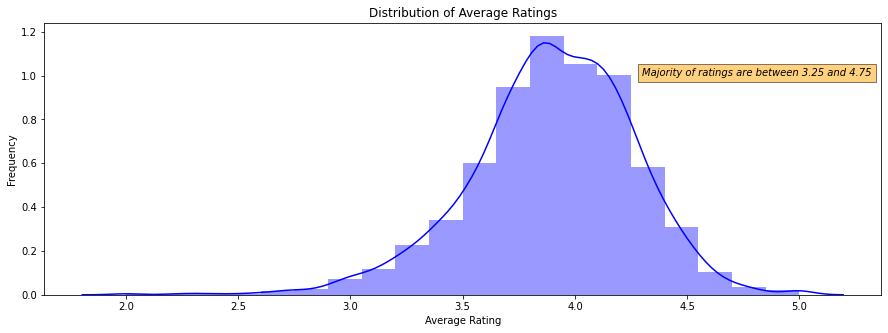

In [1311]:
# The distribution of avg ratings
plt.figure(figsize=(15,5))
sns.distplot(data['average_rating'],bins=20, color='blue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.text(4.3, 1, 'Majority of ratings are between 3.25 and 4.75', style='italic',
        bbox={'facecolor': 'orange', 'alpha': 0.5})
plt.show()

In [1312]:
#Anomaly detection

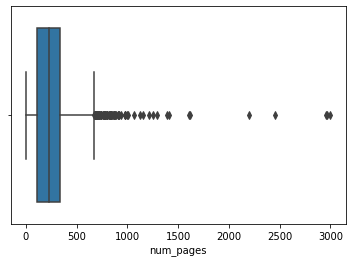

In [1313]:
# find no. of pages outliers
sns.boxplot(x=data['num_pages'])

In [1314]:
# remove outliers from no. of pages 
data = data.drop(data.index[data['num_pages'] >= 1000])

In [1334]:
len(data)

5331

In [1316]:
#Feature Engineering
#Transforming textual features into numerical features

In [1317]:
le = preprocessing.LabelEncoder()

In [1318]:
#encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [1320]:
data.head()

,authors,average_rating,num_pages,age
0,1788,4.13,162.0,14
1,2168,3.93,400.0,11
2,511,3.98,288.0,14
4,2849,4.28,332.0,8
6,1971,3.54,659.0,14


In [1321]:
#Linear Regression

In [1335]:
# divide the data into attributes and labels
X = data.drop(['average_rating','num_pages'], axis = 1)
y = data['average_rating']

In [1336]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [1337]:
#save dataframes as csv
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_frame().to_csv('y_train.csv')
y_test.to_frame().to_csv('y_test.csv')

In [1338]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [1339]:
predictions = lr.predict(X_test)

In [1340]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.64,3.886336
1,4.24,3.906543
2,4.08,3.900240
3,4.21,3.883608
4,3.99,3.906742
5,3.90,3.904736
6,4.04,3.901333
7,4.32,3.899946
8,4.12,3.908350
9,4.17,3.890906


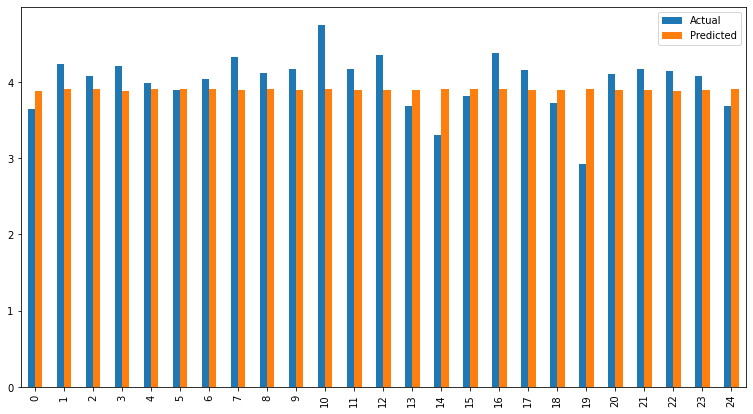

In [1341]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

In [1342]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.275166830383281
MSE: 0.12680747269110673
RMSE: 0.35610036884438456


In [1343]:
import statsmodels.api as sm
xc = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         average_rating   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              6213.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                        0.00
Time:                        20:56:39   Log-Likelihood:                         -8960.9
No. Observations:                4264   AIC:                                  1.793e+04
Df Residuals:                    4262   BIC:                                  1.794e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
authors        0.0013   1.23e-05    106.651      0.000       0.001       0.001
age            0.0047      0.001      8.803      0.000       0.004       0.006
==============================================================================
Omnibus:                       99.856   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.956
Skew:                          -0.136   Prob(JB):                     9.57e-14
Kurtosis:                       2.487   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1344]:
xc = sm.add_constant(X_test)
lr = sm.OLS(predictions, X_test).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              2401.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                        0.00
Time:                        20:56:40   Log-Likelihood:                         -2055.3
No. Observations:                1067   AIC:                                      4115.
Df Residuals:                    1065   BIC:                                      4125.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
authors        0.0010   2.71e-05     36.485      0.000       0.001       0.001
age            0.0822      0.004     20.379      0.000       0.074       0.090
==============================================================================
Omnibus:                      101.873   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.234
Skew:                          -0.685   Prob(JB):                     2.65e-35
Kurtosis:                       4.307   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""